# As the files are in pickle format, we will first have to unpickle them 

In [11]:
import pickle
import numpy as np
from PIL import Image     # I imported this to get image numpy arrays but afterwards I got to know there was no need
from matplotlib import pyplot as plt
from matplotlib.image import imread
%matplotlib inline

8000


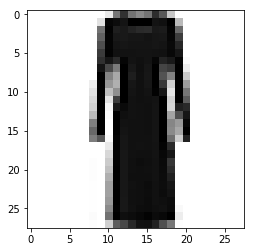

In [12]:

with open(r"train_image.pkl",'rb') as f:
    X_train=np.load(f)    #Extracting the files 
print(len(X_train))   #Used this to find the total number of images
train_X=np.reshape(X_train,(8000,28,28,1))     #Reshaping to convert it into 4D numpy arrays as Keras requires 4d arrays
    #Converting into numpy array
train_X=train_X/255   #Normalizing
plt.imshow(train_X[4789].reshape(28,28),cmap='Greys')



In [13]:
with open(r"train_label.pkl",'rb') as f:
    train_Y=pickle.load(f)
Y_train=np.reshape(train_Y,(8000,1))

print(Y_train[4789,0])

3


In [14]:
with open(r"test_image.pkl",'rb') as f:
    test_X=pickle.load(f)
print(len(test_X))
X_test=np.reshape(test_X,(2000,28,28,1))
X_test=X_test/255              #Normalizing 

2000


# To solve this problem I will be using a CNN 
# The CNN structure will be 
# Input Image-->Conv. Layer-->Max Pooling-->Fully Connected Layer--> Fully Connected Layer-->Softmax(with 6 outputs)

In [7]:
import pip
def install(package):
    pip.main(['install',package])
    install('requests')

In [ ]:
install('tensorflow')

In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

In [9]:
input_shape=(28,28,1)
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())   # As we need to use Fully Conneccted Layers
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dense(84,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))  #Last Layer will have to be softmax with 6 outputs

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_X,Y_train,epochs=10)   #using ADAM as it will deal with both Momentum and Root Mean Square Prop using Gradient Descent 

Epoch 1/10
8000/8000 [==============================] - 8s 1ms/step - loss: 0.4456 - acc: 0.8297
Epoch 2/10
8000/8000 [==============================] - 8s 1ms/step - loss: 0.3655 - acc: 0.8569
Epoch 3/10
8000/8000 [==============================] - 9s 1ms/step - loss: 0.3116 - acc: 0.8770
Epoch 4/10
8000/8000 [==============================] - 8s 1ms/step - loss: 0.2560 - acc: 0.9015
Epoch 5/10
8000/8000 [==============================] - 8s 1ms/step - loss: 0.2005 - acc: 0.9243
Epoch 6/10
8000/8000 [==============================] - 8s 1ms/step - loss: 0.1637 - acc: 0.9400
Epoch 7/10
8000/8000 [==============================] - 9s 1ms/step - loss: 0.1328 - acc: 0.9496
Epoch 8/10
8000/8000 [==============================] - 8s 1ms/step - loss: 0.1066 - acc: 0.9605
Epoch 9/10
8000/8000 [==============================] - 10s 1ms/step - loss: 0.0807 - acc: 0.9708
Epoch 10/10
8000/8000 [==============================] - 11s 1ms/step - loss: 0.0629 - acc: 0.9793


# We got 97% accuracy with 10 epochs and Adam optimizer

In [17]:
test_Y=model.predict_classes(X_test)    #Predicting output for test Set

In [18]:
for i in test_Y:
    print(i)

0
0
0
0
0
0
0
0
6
0
0
0
6
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
6
0
6
0
6
0
0
6
0
6
6
0
0
0
0
0
0
0
0
0
0
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
0
6
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
0
0
0
0
2
0
6
6
0
0
0
0
0
3
0
6
6
0
0
0
3
0
0
6
6
0
0
0
6
0
6
6
0
0
6
0
0
6
0
0
0
0
0
0
0
6
6
0
0
0
0
0
0
0
0
0
6
6
0
2
0
0
0
0
0
6
0
0
6
0
0
0
0
0
0
0
0
0
6
0
0
0
0
6
0
0
6
0
6
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
6
0
0
0
0
0
0
0
6
0
0
2
0
0
0
0
0
0
2
0
0
0
6
0
0
0
0
0
0
0
0
6
0
6
0
0
6
0
6
6
0
0
6
0
6
6
0
0
6
2
6
0
0
0
6
0
6
2
0
6
0
6
0
0
0
0
0
0
0
0
0
0
0
2
0
0
6
0
0
0
2
0
0
0
0
0
0
0
6
0
0
0
0
0
0
0
6
0
2
0
0
0
0
0
0
0
0
0
6
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
6
0
0
0
0
0
0
0
6
0
0
2
0
0
0
0
0
6
3
6
0
0
6
0
0
0
0
6
6
0
0
0
0
0
0
0
0
0
0
0
6
0
0
0
0
6
0
0
0
0
6
0
0
0
0
0
0
0
0
0
0
2
3
2
0
0
0
0
0
0
0
2
0
0
0
0
0
6
6
0
0
0
3
0
0
0
2
0
0
0
0
0
6
6
0
6
0
0
0
6
0
0
0
0
0
0
6
0
0
0
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
0
0
0
0
3
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
0
0


In [19]:
import csv

In [37]:
with open('test.csv','a') as csvFile: #creating a csv file for the labels of the test images 
    writer=csv.writer(csvFile)
    row=['image_index', 'class']
    writer.writerow(row)
    for i in range(0,len(test_Y)):
        row=[i+1, test_Y[i]]
        writer.writerow(row)
csvFile.close()

In [39]:
import os 
os.rename('test.csv','yashvardhan_verma.csv')  #Changing the file Name to the name required 